## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

- Import the required libraries.

In [2]:
## Importing essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

## Importing data visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px 

## Importing machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For feature transformation
from sklearn.compose import ColumnTransformer  # For applying multiple transformations

# Importing machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import (
    RandomForestClassifier,  
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier 

# Importing evaluation metrics for model performance assessment
from sklearn.metrics import (
    accuracy_score,  # Calculates the accuracy of the model
    classification_report,  # Provides precision, recall, and F1-score for each class
    ConfusionMatrixDisplay,  # Visual representation of the confusion matrix
    precision_score,  # Measures the precision of positive predictions
    recall_score,  # Measures the model's ability to capture positive cases
    f1_score,  # Harmonic mean of precision and recall
    roc_auc_score,  # Computes the Area Under the ROC Curve (AUC-ROC)
    roc_curve  # Generates the Receiver Operating Characteristic (ROC) curve
)

# Importing RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  # Performs random search over hyperparameters

## Suppressing warnings
import warnings
warnings.filterwarnings("ignore")  # Ignores warnings to keep output clean

## Enabling inline plotting for Jupyter Notebook
%matplotlib inline


- Load the dataset

In [3]:
df = pd.read_csv("../dataset/Travel.csv")

## **3) Data Preprocessing**

- Check the first five rows of the dataset.

In [46]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [47]:
# Check missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [49]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [50]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [51]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [52]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [53]:
df['MaritalStatus']= df['MaritalStatus'].replace('Single', 'Unmarried')

In [54]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [55]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [56]:
# Chech missing values features
feature_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), "% missing values")

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [57]:
# Statistical description (Numerical columns) of feature_with_na
df[feature_with_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [58]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [59]:
# Age 
df.Age.fillna(df.Age.median(), inplace=True)

# Type of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# Duraction Of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [60]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [61]:
# Drop customerID feature
df.drop('CustomerID', axis=1, inplace=True)

In [62]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering
### Feature Extraction

In [63]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [64]:
# create a new feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

# drop features
cols_drop = ["NumberOfPersonVisiting", "NumberOfChildrenVisiting"]
df.drop(columns=cols_drop, axis=1, inplace=True)

In [65]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


- Check all numerical and categorical columns.

In [66]:
# Numerical Features
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Number of numerical Features: ", len(numeric_features))

# In Numrical Features - Discrete Features
discrete_numeric_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print("Number of Discrete Features in Numerical Features: ", len(discrete_numeric_features))

# In Numrical Features - Continuous Features
continuous_numeric_features = [feature for feature in numeric_features if feature not in discrete_numeric_features]
print("Number of Discrete Features in Numerical Features: ", len(continuous_numeric_features))

# Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Number of Categorical Features: ", len(cat_features))

Number of numerical Features:  12
Number of Discrete Features in Numerical Features:  9
Number of Discrete Features in Numerical Features:  3
Number of Categorical Features:  6


- Seperate the independent and dependent features.

In [67]:
X = df.drop("ProdTaken", axis=1) # Independent features
y = df['ProdTaken'] # Dependent feature

In [68]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [69]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [70]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

- **Note:** Our dataset is imbalanced with 3968 instances of class 0 and 920 instances of class 1. However, ensemble techniques often perform well even with imbalanced datasets.

## Train Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [73]:
X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
3995,36.0,Self Enquiry,1,7.0,Small Business,Male,5.0,Basic,3.0,Unmarried,3.0,0,4,1,Executive,21537.0,3.0
2610,42.0,Self Enquiry,1,21.0,Salaried,Male,4.0,Basic,3.0,Married,6.0,0,4,1,Executive,21129.0,5.0
3083,50.0,Self Enquiry,1,7.0,Large Business,Female,4.0,Basic,5.0,Divorced,4.0,0,4,1,Executive,22258.0,4.0
3973,38.0,Self Enquiry,1,7.0,Salaried,Male,5.0,Deluxe,3.0,Married,3.0,0,5,0,Manager,24671.0,4.0
4044,44.0,Company Invited,1,35.0,Small Business,Female,2.0,Basic,3.0,Unmarried,6.0,0,3,0,Executive,23417.0,7.0


In [74]:
y_train.head()

3995    0
2610    0
3083    0
3973    0
4044    0
Name: ProdTaken, dtype: int64

### Creating a Column Transformer with 2 types of Transformers

In [75]:
cat_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler() # for numerical features
oh_transformer = OneHotEncoder(drop='first') # for categorical features to numeric values

# Applying multiple transformations
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, numeric_features)
    ]
)

In [76]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [77]:
# Applying transformation in training (X_train) (fit_transform)
X_train_transformed = preprocessor.fit_transform(X_train)

# Transforming the test data (X_test) (transform)
X_test_transformed = preprocessor.transform(X_test)

## **Model Training and Evaluation**


In [78]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Model instance
    model.fit(X_train_transformed,y_train) # Model train

    # Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Training Set performances
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8460
- F1 score: 0.4234
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- F1 score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9192
- F1 score: 0.9183
- Precision: 0.8111
- Recall: 0.7644
- Roc Auc Score: 0.8606


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9264
- F1 score: 0.9204
- Precision: 0.9685
- Recall: 0.6440
- Roc Auc Score: 0.8194


Gradient Boosting
Model performance for Training 

- **Note:** The Random Forest Classifier provides the best performance on both training and testing data.

## **Hyperparameter Tuning**

In [79]:
# Random Forest params
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
                }
print(rf_params)

{'max_depth': [5, 8, 15, None, 10], 'max_features': [5, 7, 'auto', 8], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [100, 200, 500, 1000]}


In [80]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [81]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [82]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("XGboost", XGBClassifier(), xgboost_params)
]

### Hyperparameter Optimization Using Randomized Search


In [83]:
model_params = {}

for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    
    randomcv.fit(X_train_transformed, y_train)
    
    model_params[name] = randomcv.best_params_
    
for model_name in model_params:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   

### Now Again train the model with the best parameters.
- ---------------- Best Params for RF -------------------
  
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

- ---------------- Best Params for XGboost -------------------
  
{'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

In [88]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
    "XGBoost": XGBClassifier(n_estimators=300, max_depth=12, learning_rate=0.1, colsample_bytree=0.8)
}

for i in range(len(list(models))):
    model = list(models.values())[i] # Model instance
    model.fit(X_train_transformed,y_train) # Model train

    # Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Training Set performances
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9335
- F1 score: 0.9289
- Precision: 0.9701
- Recall: 0.6806
- Roc Auc Score: 0.8378


XGBoost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9519
- F1 score: 0.9500
- Precision: 0.9615
- Recall: 0.7853
- Roc Auc Score: 0.8889




- **Note:** The Random Forest Classifier and XGBClassifier improves the performance on the test data after hyperparameter tuning.

### ROC-AUC Score and ROC Curve

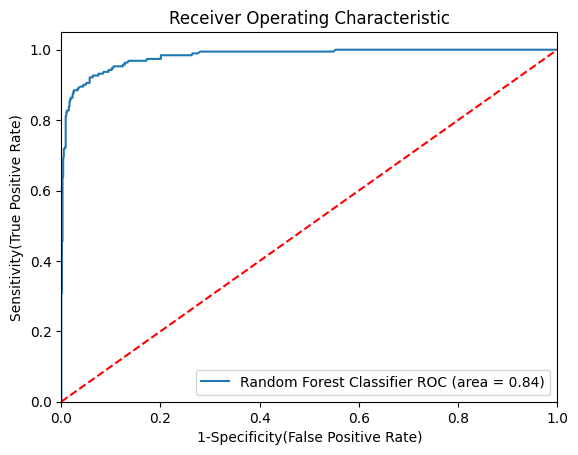

In [89]:
## Plot ROC AUC Curve
plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
        'auc': 0.8378
    }
]

# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train_transformed, y_train) # train the model
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_transformed)[:,1])
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("01_auc.png")
    plt.show() 
        

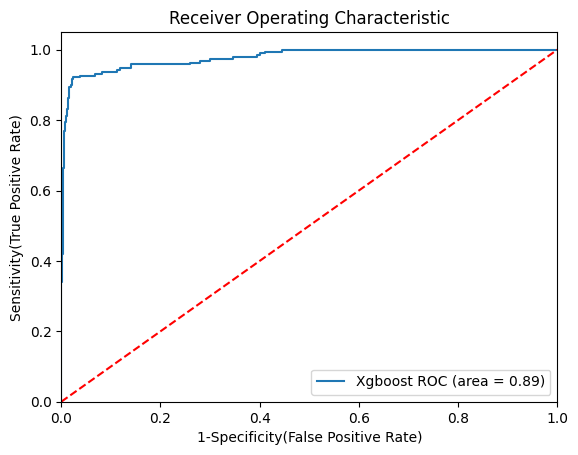

In [90]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=300, max_depth=12, learning_rate=0.1, colsample_bytree=0.8),
    'auc':  0.8889
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train_transformed, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_transformed)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("02_auc.png")
plt.show() 